# Fitting distributions using openturns

-----------------------------------------------
DTR

# Import Packages

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import openturns as ot
import openturns.viewer as viewer

In [5]:
import scienceplots

In [6]:
import os

# Directory Management

In [7]:
os.getcwd()

'C:\\Users\\drwas\\Documents\\UZ_2023_Hydrology_BSc'

# File

In [8]:
dir_data = './DATA/'

In [9]:
filename = "Inflow_Hydrograph.ods"

In [10]:
fname = os.path.join(dir_data,filename)
fname

'./DATA/Inflow_Hydrograph.ods'

# Read Data

Since we want to read an .ods file, Pandas needs us to specify the engine we are going to use. We will use the "odf" engine. You might need to install it.

In [11]:
ds_inflow = pd.read_excel( fname, sheet_name='data', engine="odf")

In [12]:
ds_inflow.head()

,Time,Inflow
0,0,100.0
1,2,120.0
2,4,150.0
3,6,200.0
4,8,223.4


In [13]:
len(ds_inflow)

19

# Distibutions in Openturns

In [14]:
for factory in ot.DistributionFactory.GetContinuousUniVariateFactories():
    print(factory)

ArcsineFactory
BetaFactory
BurrFactory
ChiFactory
ChiSquareFactory
DirichletFactory
ExponentialFactory
FisherSnedecorFactory
FrechetFactory
GammaFactory
GeneralizedParetoFactory
GumbelFactory
HistogramFactory
InverseNormalFactory
LaplaceFactory
LogisticFactory
LogNormalFactory
LogUniformFactory
MeixnerDistributionFactory
NormalFactory
ParetoFactory
RayleighFactory
RiceFactory
StudentFactory
TrapezoidalFactory
TriangularFactory
TruncatedNormalFactory
UniformFactory
VonMisesFactory
WeibullMaxFactory
WeibullMinFactory


# Fit Selected Distributions

In [15]:
data_inflows = ds_inflow.Inflow.values
data_inflows

array([100. , 120. , 150. , 200. , 223.4, 241.5, 260. , 248.8, 228.5,
       205. , 180. , 150. , 120. , 110. , 100. , 100. , 100. , 100. ,
       100. ])

In [16]:
data_inflows = ot.Sample([[xi] for xi in data_inflows])

In [17]:
type(data_inflows)

openturns.typ.Sample

In [18]:
# define distributions you want to test on the sample
distributions_selected = [ot.WeibullMaxFactory(), ot.NormalFactory(), ot.GumbelFactory(), ot.ParetoFactory() ]

## Fit using BIC

In [19]:
best_fit_dist, best_gof_bic = ot.FittingTest.BestModelBIC(data_inflows, distributions_selected)
print('-----------------------------')
print('Best fitting distribution: ', best_fit_dist )
print('BIC: ', best_gof_bic )


-----------------------------
Best fitting distribution:  Gumbel(beta = 46.7688, gamma = 132.857)
BIC:  11.165406113906247


Other fitting options:

    - BestModelAIC
    - BestModelChiSquared
    - BestModelKolmogorov
    - BestModelLilliefors

## Plotting using openturns

###  pdf plot

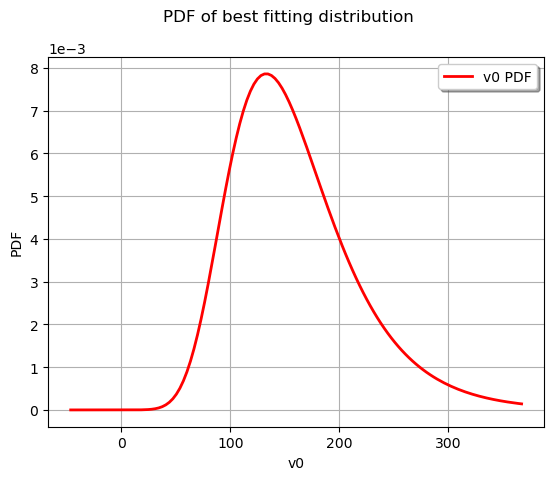

In [20]:
graph = best_fit_dist.drawPDF()
graph.setTitle("PDF of best fitting distribution")
view = viewer.View(graph)

### cdf plot

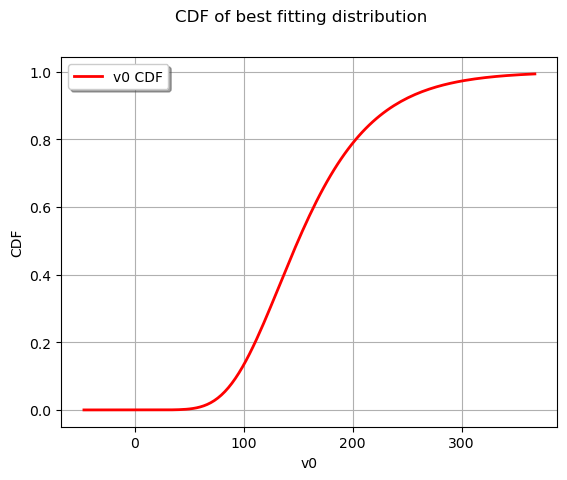

In [21]:
graph = best_fit_dist.drawCDF()
graph.setTitle("CDF of best fitting distribution")
view = viewer.View(graph)